Comenzaremos por importar los módulos necesarios

In [21]:
import pandas as pd #Importamos las librerías necesarias y los módulos de scikit-learn que utilizaremos
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

Además, en el proceso probé otros modelos de sklearn, aunque no quedé conforme con los resultados:

Ingestamos los datasets con los que trabajaremos

In [2]:
train = pd.read_excel('E-Commerce_train.xlsx') #Ingestamos ambos archivos
test = pd.read_excel('E-Commerce_test.xlsx')

Intentaremos conocer un poco nuestros datos, y buscaremos valores faltantes o marcadamente fuera de lo común

In [3]:
print('Train:\n',train.isnull().sum()) #Comenzando con el set Train, contamos los valores faltantes
print(train.describe())              #Observamos las estadísticas más comunes
print(train.columns)                #Listamos las columnas para una mejor comprensión
for col in train.columns: print(np.sort(train[col].unique()))   #Observamos todos los valores para cada columna
print('Test:\n',test.isnull().sum()) #Repetimos el proceso en el set Test
print(test.describe())
print(test.columns)
for col in test.columns: print(np.sort(test[col].unique()))

Train:
 ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
               ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  8999.00000          8999.000000      8999.000000          8999.000000   
mean   4500.00000             4.015113         2.994999           208.561507   
std    2597.93187             1.138934         1.413143            48.289172   
min       1.00000             2.000000         1.000000            96.000000   
25%    2250.50000             3.000000         2.000000           168.000000   
50%    4500.00000             4.000000         3.000000           211.000000   
75%    6749.50000             5.000000         4.000000           249.500000   
max    8999.00000             7.000000 

Del análisis exploratorio no hemos obtenido valores faltantes o marcadamente fuera de lo común, pero habiendo percibido una importante diferencia entre los valores de 'Discount_offered' de las tablas, decidimos analizarla

In [4]:
train.groupby('Discount_offered').describe() #Observamos en este caso la relación ente el descuento y el promedio de entregas a tiempo

ID                                                    \
                  count         mean          std    min      25%     50%   
Discount_offered                                                            
1                 639.0  5752.525822  2095.059751   13.0  4113.00  5903.0   
2                 652.0  5668.384969  2105.410628   23.0  4144.25  5752.5   
3                 643.0  5681.601866  2026.207907    7.0  4316.00  5824.0   
4                 632.0  5711.110759  1985.275069   34.0  4244.25  5738.0   
5                 622.0  5689.824759  2046.596238   99.0  4142.75  5848.0   
...                 ...          ...          ...    ...      ...     ...   
61                 53.0  1561.320755   945.668135   32.0   638.00  1696.0   
62                 49.0  1505.102041   894.171713   37.0   768.00  1582.0   
63                 53.0  1609.584906   881.668249  144.0   978.00  1654.0   
64                 43.0  1826.372093   915.972266   61.0  1104.00  1986.0   
65                 36.0  1448.694444   878.941338  112.0   778.50  1316.0   

                                  Customer_care_calls            ...  \
                      75%     max               count      mean  ...   
Discount_offered                                                 ...   
1                 7513.00  8995.0               639.0  4.078247  ...   
2                 7484.00  8975.0               652.0  4.157975  ...   
3                 7216.50  8996.0               643.0  4.110420  ...   
4                 7409.75  8999.0               632.0  4.072785  ...   
5                 7363.25  8998.0               622.0  4.120579  ...   
...                   ...     ...                 ...       ...  ...   
61                2452.00  3054.0                53.0  3.924528  ...   
62                2217.00  2990.0                49.0  3.734694  ...   
63                2441.00  3006.0                53.0  3.698113  ...   
64                2635.00  3087.0                43.0  3.744186  ...   
65                2171.00  2898.0                36.0  3.944444  ...   

                 Weight_in_gms         Reached.on.Time_Y.N            \
                           75%     max               count      mean   
Discount_offered                                                       
1                      5326.50  5999.0               639.0  0.494523   
2                      5273.75  5986.0               652.0  0.509202   
3                      5252.00  5986.0               643.0  0.486781   
4                      5289.50  6000.0               632.0  0.473101   
5                      5324.00  6102.0               622.0  0.495177   
...                        ...     ...                 ...       ...   
61                     3096.00  3812.0                53.0  1.000000   
62                     3259.00  3997.0                49.0  1.000000   
63                     2751.00  3788.0                53.0  1.000000   
64                     2889.00  3812.0                43.0  1.000000   
65                     3508.25  3984.0                36.0  1.000000   

                                                     
                       std  min  25%  50%  75%  max  
Discount_offered                                     
1                 0.500362  0.0  0.0  0.0  1.0  1.0  
2                 0.500299  0.0  0.0  1.0  1.0  1.0  
3                 0.500214  0.0  0.0  0.0  1.0  1.0  
4                 0.499671  0.0  0.0  0.0  1.0  1.0  
5                 0.500379  0.0  0.0  0.0  1.0  1.0  
...                    ...  ...  ...  ...  ...  ...  
61                0.000000  1.0  1.0  1.0  1.0  1.0  
62                0.000000  1.0  1.0  1.0  1.0  1.0  
63                0.000000  1.0  1.0  1.0  1.0  1.0  
64                0.000000  1.0  1.0  1.0  1.0  1.0  
65                0.000000  1.0  1.0  1.0  1.0  1.0  

[65 rows x 56 columns]

Hemos descubierto que aquellas ventas con descuento mayor al 10% siempre se entregaron a tiempo, pero como el dataset de testeo no tiene descuentos mayores al 10% eliminaremos dichas entradas. Además convertiremos en número las columnas con valores categóricas, para poder utilizarlas en el modelo

In [5]:
df = train.loc[train['Discount_offered'] <= 10] #Quitamos los descuentos mayores al 10%
importance = {'low':1,'medium':2,'high':3} #Haremos diccionarios para facilitar el replace en cada columna
gender = {'F':1,'M':2}
warehouse = {'A':1,'B':2,'C':3,'D':4,'F':5}
shipment = {'Road':1,'Flight':2,'Ship':3}
num = df.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment}) #Reemplazamos los valores categóricos por códigos numéricos, para poder utilizar los datos con el modelo más tarde
num.describe() #Observamos el dataframe ya numerizado

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000
mean,5722.395466,3.327613,2.517947,4.126574,2.995592,213.714421,3.601385,1.602960,1.499370,5.473709,4091.737406,0.483627
std,2034.881336,1.491974,0.756430,1.175930,1.410416,48.471799,1.527201,0.645304,0.500039,2.874688,1570.853596,0.499771
min,4.000000,1.000000,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1.000000,1.000000,1001.000000,0.000000
25%,4235.750000,2.000000,2.000000,3.000000,2.000000,173.000000,3.000000,1.000000,1.000000,3.000000,2881.000000,0.000000
50%,5823.500000,3.000000,3.000000,4.000000,3.000000,220.000000,3.000000,2.000000,1.000000,5.000000,4598.000000,0.000000
75%,7411.250000,5.000000,3.000000,5.000000,4.000000,254.000000,4.000000,2.000000,2.000000,8.000000,5294.000000,1.000000
max,8999.000000,5.000000,3.000000,7.000000,5.000000,310.000000,10.000000,3.000000,2.000000,10.000000,6102.000000,1.000000


Hemos realizado pruebas con el dataset, quitando columnas y comparando los resultados del modelo, descubriendo así que la columna que más influenciaba el modelo era 'ID', por lo que decidimos revisarla. Dado que la tarea se vuelve compleja por la diversidad de IDs, discretizaremos la columna

In [6]:
viz = num.copy() #Hacemos una copia del dataframe  
viz['binned']=pd.cut(viz['ID'],bins=9) #Discretizamos la columna 'ID' en 'binned'
viz.groupby('binned').describe() #Observamos el dataframe agrupando valores por la columna 'binned', en busca de valores atípicos

ID                                            \
                       count         mean         std     min      25%   
binned                                                                   
(-4.995, 1003.444]     159.0   522.522013  295.516943     4.0   246.00   
(1003.444, 2002.889]   154.0  1498.675325  260.371451  1004.0  1292.00   
(2002.889, 3002.333]   153.0  2533.392157  298.015437  2019.0  2271.00   
(3002.333, 4001.778]   888.0  3555.935811  259.360234  3003.0  3335.75   
(4001.778, 5001.222]  1000.0  4501.500000  288.819436  4002.0  4251.75   
(5001.222, 6000.667]   999.0  5501.000000  288.530761  5002.0  5251.50   
(6000.667, 7000.111]  1000.0  6500.500000  288.819436  6001.0  6250.75   
(7000.111, 7999.556]   999.0  7500.000000  288.530761  7001.0  7250.50   
(7999.556, 8999.0]    1000.0  8499.500000  288.819436  8000.0  8249.75   

                                              Warehouse_block            ...  \
                         50%      75%     max           count      mean  ...   
binned                                                                   ...   
(-4.995, 1003.444]     529.0   769.50  1003.0           159.0  3.245283  ...   
(1003.444, 2002.889]  1489.0  1708.00  1995.0           154.0  3.350649  ...   
(2002.889, 3002.333]  2535.0  2802.00  3002.0           153.0  3.287582  ...   
(3002.333, 4001.778]  3557.5  3779.25  4001.0           888.0  3.313063  ...   
(4001.778, 5001.222]  4501.5  4751.25  5001.0          1000.0  3.335000  ...   
(5001.222, 6000.667]  5501.0  5750.50  6000.0           999.0  3.333333  ...   
(6000.667, 7000.111]  6500.5  6750.25  7000.0          1000.0  3.332000  ...   
(7000.111, 7999.556]  7500.0  7749.50  7999.0           999.0  3.335335  ...   
(7999.556, 8999.0]    8499.5  8749.25  8999.0          1000.0  3.331000  ...   

                     Weight_in_gms         Reached.on.Time_Y.N            \
                               75%     max               count      mean   
binned                                                                     
(-4.995, 1003.444]         3304.50  6102.0               159.0  1.000000   
(1003.444, 2002.889]       3346.25  3986.0               154.0  1.000000   
(2002.889, 3002.333]       2864.00  3949.0               153.0  1.000000   
(3002.333, 4001.778]       5469.25  6000.0               888.0  0.453829   
(4001.778, 5001.222]       5398.25  5995.0              1000.0  0.433000   
(5001.222, 6000.667]       5401.00  5997.0               999.0  0.451451   
(6000.667, 7000.111]       5233.50  5995.0              1000.0  0.440000   
(7000.111, 7999.556]       5248.00  5990.0               999.0  0.454454   
(7999.556, 8999.0]         5272.00  6000.0              1000.0  0.425000   

                                                         
                           std  min  25%  50%  75%  max  
binned                                                   
(-4.995, 1003.444]    0.000000  1.0  1.0  1.0  1.0  1.0  
(1003.444, 2002.889]  0.000000  1.0  1.0  1.0  1.0  1.0  
(2002.889, 3002.333]  0.000000  1.0  1.0  1.0  1.0  1.0  
(3002.333, 4001.778]  0.498144  0.0  0.0  0.0  1.0  1.0  
(4001.778, 5001.222]  0.495739  0.0  0.0  0.0  1.0  1.0  
(5001.222, 6000.667]  0.497887  0.0  0.0  0.0  1.0  1.0  
(6000.667, 7000.111]  0.496635  0.0  0.0  0.0  1.0  1.0  
(7000.111, 7999.556]  0.498171  0.0  0.0  0.0  1.0  1.0  
(7999.556, 8999.0]    0.494590  0.0  0.0  0.0  1.0  1.0  

[9 rows x 96 columns]

Hemos obtenido que las entradas con ID menor a 3003 siempre se entregaron a tiempo, pero al no encontrarse valores de ID menores a 9000 en el set de testeo se eliminarán

In [7]:
num1 = num.loc[(num['ID'] > 3002)] #Quitamos los ID menores a 3003

Comprobaremos si hay algún patrón visible en las demás variables, aunque sólo dejaremos registrado Mode_of_Shipment a modo de ejemplo

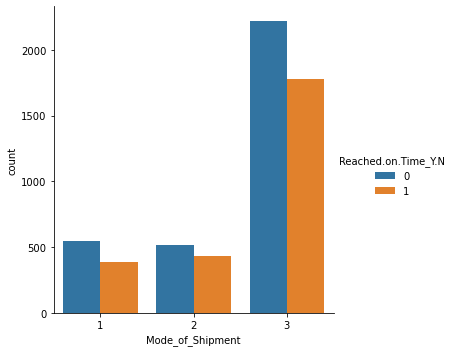

In [8]:
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=num1,kind="count") #Graficamos para comprobar si a lo largo de los valores de la columna cabia la relación entre 1 y 0 en nuestro target

No habiendo encontrado nuevos patrones concluimos que la EDA está terminada satisfactoriamente, y procedemos a preparar los arrays para entrenar el modelo y hacer el split entre train y test

In [9]:
x = num1.drop(columns='Reached.on.Time_Y.N').values #Obtenemos los arrays que necesitamos del dataset, uno con las variables y el otro con el target
y = num1['Reached.on.Time_Y.N'].values
x.reshape(-1,11) #Nos aseguramos que los arrays tengan la forma necesaria 
y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y ,test_size=0.25,random_state=42) #Realizamos el split

IMPORTANTE: Al realizar el split hemos establecido un random_state para poder replicar la misma distribución. Al observar las matrices de confusión los datos del target parecen balanceados, por lo que no se realizó una estratificación. El número 7 se eligió por ser mi numero de la suerte :) No obstante, en caso de replicarse el proceso en una computadora con otro sistema operativo (que no sea Linux Mint 20.3 Una) el split podría resultar diferente, por no aplicar de la misma manera random_state entre distintos OS. Por este motivo, exportaremos luego los subsets de entrenamiento y testeo como .csv

In [10]:
'''
a = np.hstack((x_train,y_train.reshape(-1,1))) #Rearmamos los arrays teniendo en cuenta el split
b = np.hstack((x_test,y_test.reshape(-1,1)))
adf = pd.DataFrame(a,columns=list(train.columns)) #Convertimos los arrays en dataframes
bdf = pd.DataFrame(b,columns=list(train.columns))
adf.to_csv('train_subset.csv',index=False) #Exportamos los subsets
bdf.to_csv('test_subset.csv',index=False)
'''

"\na = np.hstack((x_train,y_train.reshape(-1,1))) #Rearmamos los arrays teniendo en cuenta el split\nb = np.hstack((x_test,y_test.reshape(-1,1)))\nadf = pd.DataFrame(a,columns=list(train.columns)) #Convertimos los arrays en dataframes\nbdf = pd.DataFrame(b,columns=list(train.columns))\nadf.to_csv('train_subset.csv',index=False) #Exportamos los subsets\nbdf.to_csv('test_subset.csv',index=False)\n"

En el caso que se quisiera probar el modelo con los datasets generados por el split, se deberá correr únicamente la importación de librerías y las celdas que siguen a esta. En caso contrario, se debera omitir la póxima celda.
Por fines prácticos toda la celda estará comentada, por lo que antes de ejecutarla se deberán quitar las líneas 1 y 12

In [11]:
'''
train_subset = pd.read_csv('train_subset.csv') #Ingestamos los datos en dataframes
test_subset = pd.read_csv('test_subset.csv')
x_train = train_subset.drop(columns='Reached.on.Time_Y.N').values  #Obtenemos los arrays de entrenamiento y testeo
y_train = train_subset['Reached.on.Time_Y.N'].values
x_test = test_subset.drop(columns='Reached.on.Time_Y.N').values
y_test = test_subset['Reached.on.Time_Y.N'].values
x_train.reshape(-1,11) #Aseguramos que la forma de los arrays sea la requerida por el modelo
y_train.reshape(-1,11)
x_test.reshape(-1,1)
y_test.reshape(-1,1)
'''

"\ntrain_subset = pd.read_csv('train_subset.csv') #Ingestamos los datos en dataframes\ntest_subset = pd.read_csv('test_subset.csv')\nx_train = train_subset.drop(columns='Reached.on.Time_Y.N').values  #Obtenemos los arrays de entrenamiento y testeo\ny_train = train_subset['Reached.on.Time_Y.N'].values\nx_test = test_subset.drop(columns='Reached.on.Time_Y.N').values\ny_test = test_subset['Reached.on.Time_Y.N'].values\nx_train.reshape(-1,11) #Aseguramos que la forma de los arrays sea la requerida por el modelo\ny_train.reshape(-1,11)\nx_test.reshape(-1,1)\ny_test.reshape(-1,1)\n"

Construiremos el modelo de Árbol y lo entrenaremos. Max_depth se estableció por obtener el mejor recall luego de probar con diversos valores

In [60]:
model = DecisionTreeClassifier(max_depth=21) #Creamos el modelo

model.fit(x_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=21)

Realizaremos las predicciones de nuestro modelo, para comprobar su funcionamiento

In [61]:
y_train_pred = model.predict(x_train) #Realizamos las predicciones
y_test_pred = model.predict(x_test)

matrix1 = confusion_matrix(y_train, y_train_pred) #Armamos las matrices de confusión para ambos subsets
matrix2 = confusion_matrix(y_test,y_test_pred)

print('Matrix1:\n',matrix1,'\nMatrix2:\n',matrix2) #Imprimimos las matrices

Matrix1:
 [[2403   57]
 [ 106 1848]] 
Matrix2:
 [[459 361]
 [362 290]]


Hemos utilizado el modelo para predecir, dando como resultado un buen recall, aunque predice demasiados falsos positivos en el set de entrenamiento

Realizaremos ahora en el set de testeo la misma normalización que realizamos en el set de entrenamiento

In [17]:
testing = test.replace({'Product_importance':importance,'Gender':gender,'Warehouse_block':warehouse,'Mode_of_Shipment':shipment}).values.reshape(-1,11)
#Hacemos la misma normalización que en el set anterior, sin necesidad de rehacer los diccionarios, y lo imprimiremos para controlar

Por último, haremos la predicción sobre el set de testeo y exportaremos los resultados en el formato solicitado

In [62]:
resultados = model.predict(testing) #Realizamos las predicciones
res = pd.DataFrame(resultados,columns=['pred']) #Convertimos los resultados a un dataframe
res.to_csv('UMazzucco.csv',index=False) #Exportamos los resultados

Finalmente, comprobaremos que nuestro modelo no predice cantidades astronómicas de positivos

In [63]:
print('El modelo predijo',float(res.mean()*int(len(res))),'valores positivos') #Imprimimos un mensaje con la cantidad de valores 1 en el .csv de salida

El modelo predijo 685.0 valores positivos
